# DAY 14: Africa

https://x.com/tjukanov/status/1708562689960648930?s=20

## Imports

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import geopandas as gpd
import shapely.ops as so  # geometric operations e.g. merging, transforming, etc.
from shapely.geometry import Point, Polygon
from shapely import wkt

import warnings
warnings.filterwarnings('ignore')

In [15]:
from matplotlib import font_manager

# Add system fonts so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [16]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Get the data

In [17]:
gdf = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres")
)

gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [18]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Europe data only and calculations

In [19]:
gdf_europe = (
    gdf
    .loc[gdf["continent"] == "Europe"]
    .copy(deep=True)
    .reset_index(drop=True)
)

gdf_europe

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
1,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
5,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."
6,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
9,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


In [20]:
len(gdf_europe)

39

## Monarchies in Europe

In [21]:
# These countries are included in the countries shape file
is_monarchy = gdf_europe["name"].isin(
    [
        "Denmark", "Sweden", "United Kingdom", "Spain", "Netherlands", "Belgium",
        "Luxembourg", "Norway"
    ]
)

In [22]:
sum(is_monarchy)

8

### Other kingdoms

These locations were too small to be included in the shape file and therefore are added manually

In [23]:
df = pd.DataFrame.from_dict(
    {
        "Andorra": ["POINT (1.521801 42.506285)"],
        "Vatican City": ["POINT (12.453389 41.902916)"],
        "Liechtenstein": ["POINT (9.520935000000001 47.14103919999999)"],
        "Monaco": ["POINT (7.424615799999999 43.73841760000001)"],
    },
    orient="index",
    columns=["points"]
)

df

,points
Andorra,POINT (1.521801 42.506285)
Vatican City,POINT (12.453389 41.902916)
Liechtenstein,POINT (9.520935000000001 47.14103919999999)
Monaco,POINT (7.424615799999999 43.73841760000001)


In [24]:
gdf_points = gpd.GeoSeries(
    data=[wkt.loads(p) for p in df["points"]],
    index=df.index,
    crs="EPSG:4326",
)

gdf_points

Andorra           POINT (1.52180 42.50628)
Vatican City     POINT (12.45339 41.90292)
Liechtenstein     POINT (9.52094 47.14104)
Monaco            POINT (7.42462 43.73842)
dtype: geometry

## Plot

In [25]:
edge_color_monarchy = "#CB34B5"
hatch_color = "#CB34B5"
fill_monarchy = "#e9abe0"
edge_color_all = "#6ECA77"
fill_all = "#E1F4E3"
hatch_pattern = "xx"

plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 14,
        "hatch.linewidth": 0.35,
    }
)

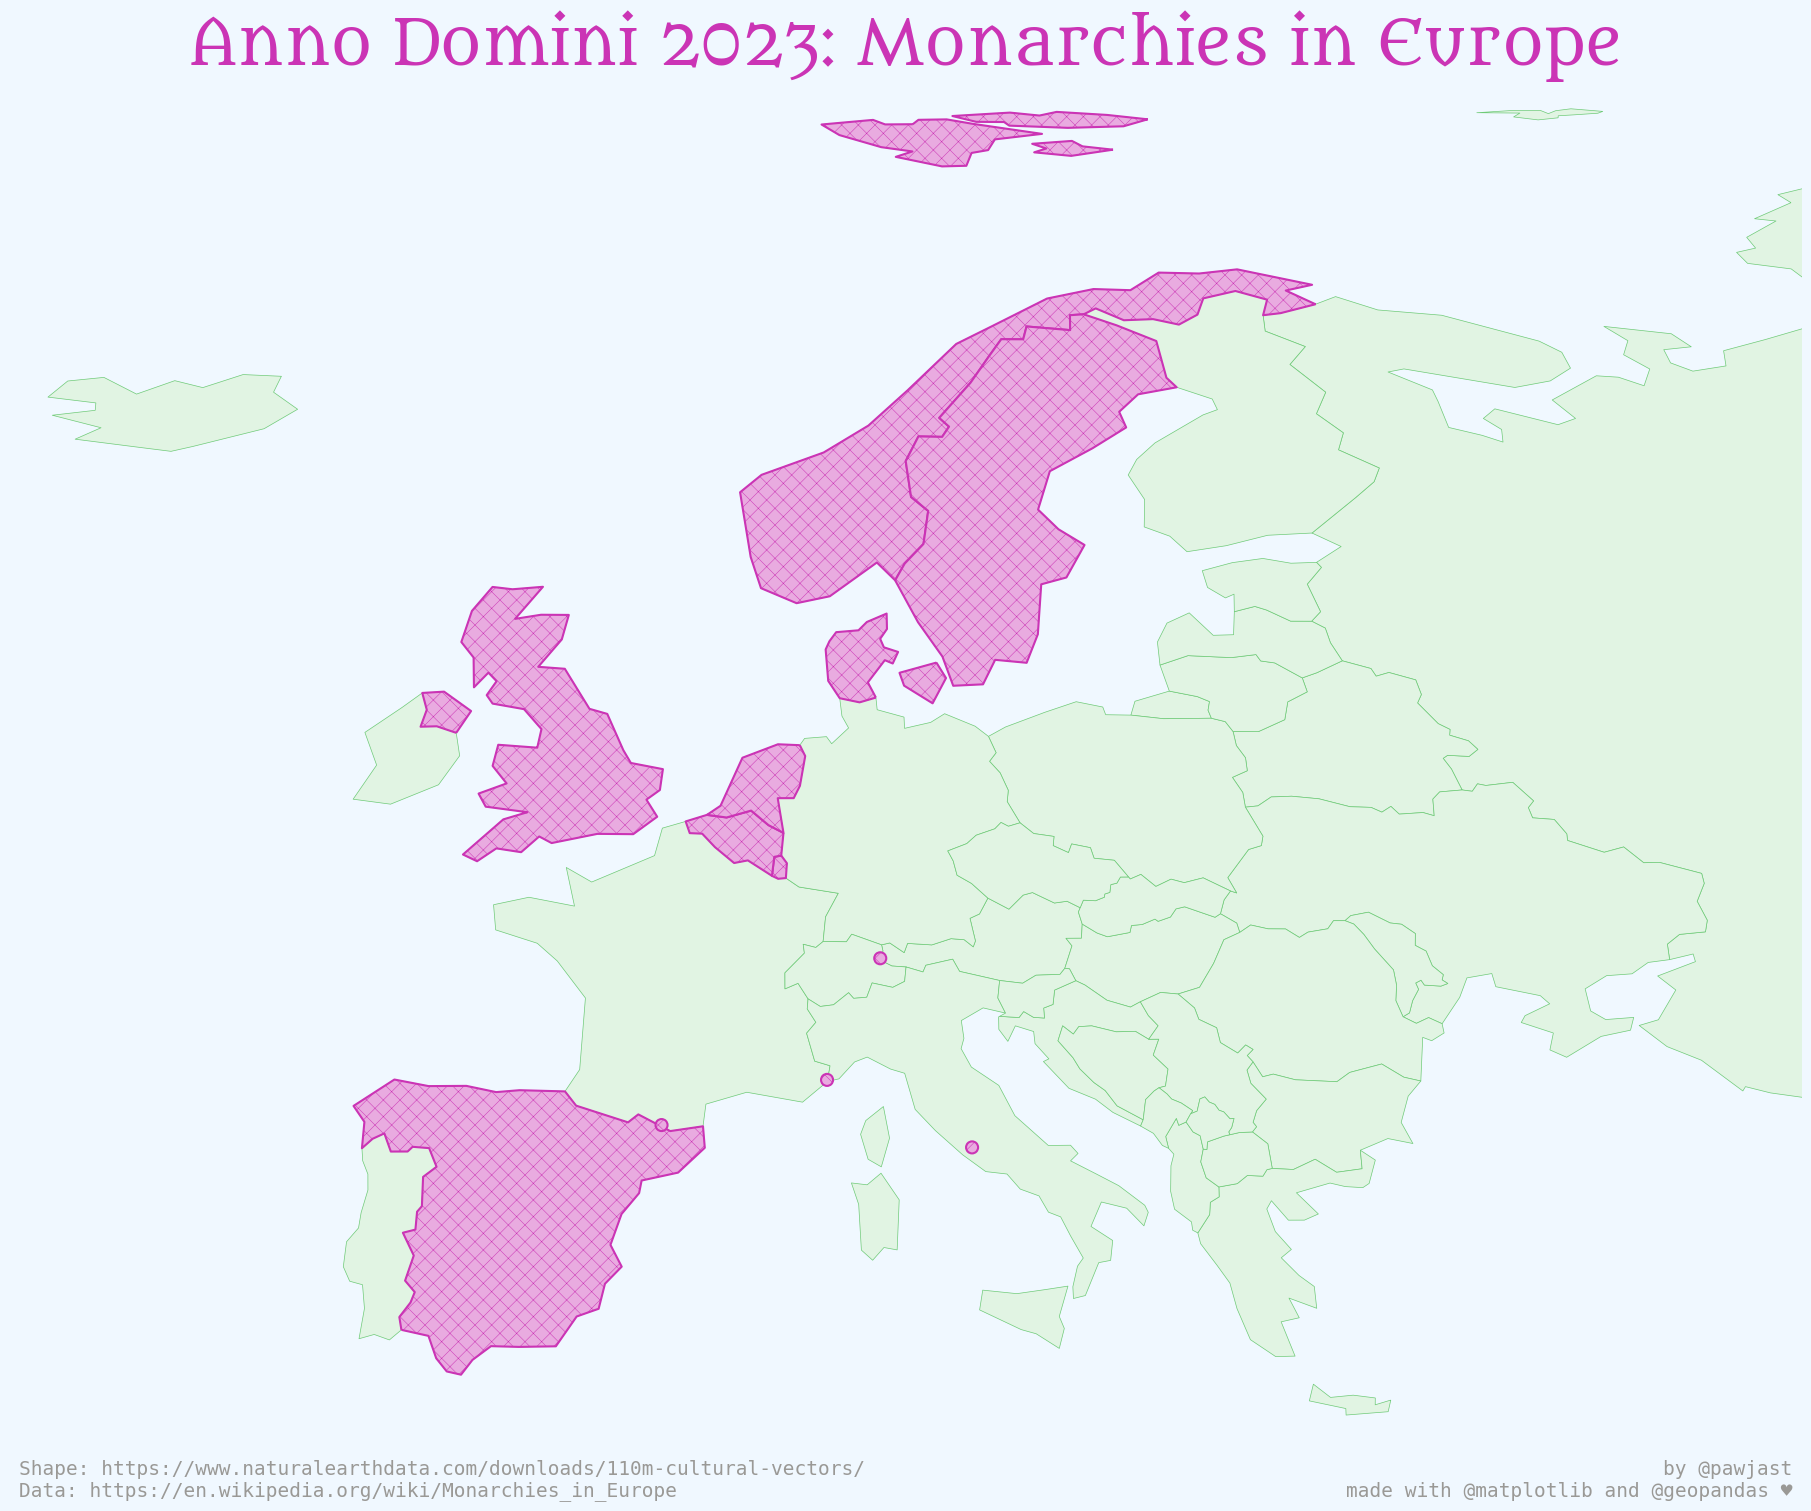

In [26]:
fig, ax = plt.subplots(
    figsize=(18, 15.25),
    layout="constrained",
    facecolor="aliceblue",
    sharex=True,
    sharey=True
)

ax.set_title(
    "Anno Domini 2023: Monarchies in Europe",
    fontfamily="Metamorphous",
    fontsize=45,
    color=edge_color_monarchy,
    weight="bold"
)
gdf_europe.to_crs('ESRI:54012').boundary.plot(
    ax=ax,
    facecolor=fill_all,
    edgecolor=edge_color_all,
    lw=0.5,
    zorder=1
)
gdf_europe.to_crs('ESRI:54012').loc[is_monarchy].plot(
    ax=ax,
    facecolor=fill_monarchy,
    edgecolor=hatch_color,
    hatch=hatch_pattern,
    lw=1.5,
    zorder=2
)
gdf_points.to_crs('ESRI:54012').plot(
    ax=ax,
    marker="o",
    markersize=75,
    facecolor=fill_monarchy,
    edgecolor=edge_color_monarchy,
    hatch=hatch_pattern,
    linewidth=1.5,
    zorder=3
)

ax.set_xlim(
    -1_800_000, 
    3_500_000, 

)
ax.set_ylim(
    4_375_000,
    8_375_000,
)
ax.set_axis_off()

ax.text(
    0.005, 0.-0.05,
    "Shape: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/\nData: https://en.wikipedia.org/wiki/Monarchies_in_Europe",
    transform =ax.transAxes,
    horizontalalignment="left",
    verticalalignment="bottom",
    color="#9a9996",
    family="monospace",
    weight="medium",
    # fontsize=10
);
ax.text(
    0.995, 0.-0.05,
    "by @pawjast\nmade with @matplotlib and @geopandas \u2665",
    transform =ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

## End